# Python TFM Section

## Modelling III

1. Develope and improve the most sucessful model

In [60]:
from pathlib import Path
from scipy import stats

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize = df_modelize.fillna(0)

df_modelize['INTEGRAL_COSTS']  = \
df_modelize['AMONIACO'] + \
df_modelize['ATR'] + \
df_modelize['BONO_SOCIAL_PEGO'] + \
df_modelize['CALIZAS'] + \
df_modelize['CANON HID'] + \
df_modelize['CANON_CONCESION'] + \
df_modelize['CANON_HID_CATALUÃÂA'] + \
df_modelize['CANON_NC_CATALUÃÂA'] + \
df_modelize['CANON_NC_EST'] + \
df_modelize['CENTIMO_VERDE'] + \
df_modelize['COSTE_COMBUSTIBLE'] + \
df_modelize['IMPUESTO ELECT'] + \
df_modelize['LUBRICANTES'] + \
df_modelize['OTROS'] + \
df_modelize['PEAJE GEN'] +  \
df_modelize['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize['SERV_GEST_RES'] + \
df_modelize['TASAS_MEDIOAMB'] + \
df_modelize['TASA_ARAGON'] 



df_modelize2 = df_modelize[['VERSION','ID_TECNOLOGIA','POWER_MWH','INTEGRAL_COSTS']]
df_tech= df_modelize2[['ID_TECNOLOGIA']].drop_duplicates()
df_tech['NUM_TECH']= [1,2,3,4,5,6,7,8]
df_tech.reset_index
df_modelize2 = pd.merge(df_modelize2, df_tech, on=['ID_TECNOLOGIA'], how='left')
df_modelize2 = df_modelize2[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']]


df_modelize2= df_modelize2[(np.abs(stats.zscore(df_modelize2)) < 2).all(axis=1)].reset_index()
df_modelize2 = df_modelize2[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']]
df_modelize2 = df_modelize2[(df_modelize2['POWER_MWH']>0)]
df_modelize2 = df_modelize2[(df_modelize2['INTEGRAL_COSTS']<0)]
df_modelize2 = df_modelize2[df_modelize2['NUM_TECH'] != 3]
df_modelize2 = df_modelize2[df_modelize2['NUM_TECH'] != 4]
df_modelize2['VERSION_Y'] = df_modelize2['VERSION'].astype(str).str[:-2].astype(np.int64)
df_modelize2['VERSION_M'] = df_modelize2['VERSION'].astype(str).str[4:].astype(np.int64)
df_modelize2.head(5)

,VERSION,POWER_MWH,INTEGRAL_COSTS,NUM_TECH,VERSION_Y,VERSION_M
0,201701,940091.558,-11215426.0,1,2017,1
2,201701,22830.702,-242300.0,2,2017,1
4,201701,11909.436,-105460.0,2,2017,1
7,201701,84359.878,-4035043.0,5,2017,1
8,201701,109060.598,-2625416.0,5,2017,1


In [78]:
from sklearn.preprocessing import StandardScaler
colnames = df_modelize2.columns
scaler = StandardScaler()
df_Scaled = scaler.fit_transform(df_modelize2.values)
df_Scaled


array([[-0.99004856, -0.65686358, -2.35460153, -1.4715309 , -0.88494776,
        -1.56640466],
       [-0.99004856, -0.98820305,  1.09288599, -1.05190359, -0.88494776,
        -1.56640466],
       [-0.99004856, -0.99214811,  1.13587776, -1.05190359, -0.88494776,
        -1.56640466],
       ...,
       [ 1.23560471, -0.94712972,  1.0091802 , -1.05190359,  1.13001021,
         1.59064491],
       [ 1.23560471, -0.99110736,  1.15648736,  1.04623295,  1.13001021,
         1.59064491],
       [ 1.23560471,  3.18869986, -0.42607189, -1.4715309 ,  1.13001021,
         1.59064491]])

In [79]:
# Code for inversing the transformation once the predictor is used
df4 = scaler.inverse_transform(df_Scaled)
df4 = pd.DataFrame(df4)
df4.columns = colnames
df4.head(5)

,VERSION,POWER_MWH,INTEGRAL_COSTS,NUM_TECH,VERSION_Y,VERSION_M
0,201701.0,940091.558,-11215426.0,1.0,2017.0,1.0
1,201701.0,22830.702,-242300.0,2.0,2017.0,1.0
2,201701.0,11909.436,-105460.0,2.0,2017.0,1.0
3,201701.0,84359.878,-4035043.0,5.0,2017.0,1.0
4,201701.0,109060.598,-2625416.0,5.0,2017.0,1.0


In [80]:
df_Scaled = pd.DataFrame(df_Scaled)
df_Scaled.columns = colnames
df_Scaled.head(5)

,VERSION,POWER_MWH,INTEGRAL_COSTS,NUM_TECH,VERSION_Y,VERSION_M
0,-0.990049,-0.656864,-2.354602,-1.471531,-0.884948,-1.566405
1,-0.990049,-0.988203,1.092886,-1.051904,-0.884948,-1.566405
2,-0.990049,-0.992148,1.135878,-1.051904,-0.884948,-1.566405
3,-0.990049,-0.965977,-0.098701,0.206978,-0.884948,-1.566405
4,-0.990049,-0.957054,0.344169,0.206978,-0.884948,-1.566405


# Model Aplication

## Instances Creation

In [66]:
# Import Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_Scaled[['VERSION_M','VERSION_Y','NUM_TECH','POWER_MWH']]
y = df_Scaled['INTEGRAL_COSTS']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

## XGBoost

In [67]:
# Load the library
import xgboost as XGB
# Create an instance
regXGB = XGB.XGBRegressor(n_estimators=100, 
                          learning_rate=0.1, 
                          gamma=0, 
                          subsample=0.7,
                          colsample_bytree=1, 
                          max_depth=6)
# Fit the data
regXGB.fit(X_train,y_train)
# Do predictions
y_regXGB_pred = regXGB.predict(X_test)

0.22570712482289718


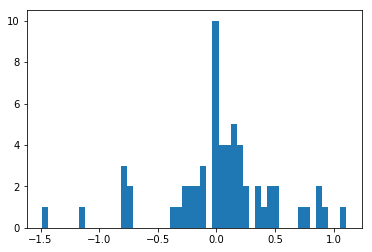

In [68]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,y_regXGB_pred))
plt.hist(y_test-y_regXGB_pred,bins=50);

## XGBoost with GridSearchCV [Final Model]

In [69]:
# Load the library
from sklearn.model_selection import GridSearchCV
import xgboost as XGB

In [70]:
# Load the library
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
# Create an instance
        
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'learning_rate': [0.01, 0.05, 0.11], 
              'max_depth':np.arange(3,10),
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree':[0.3,0.6,0.9,1],
              'n_estimators': [500]}

regXGBGS = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        scoring="neg_mean_squared_error",
                        verbose=9)

# Fit the data
regXGBGS.fit(X_train,y_train)


print(regXGBGS.best_params_)
print(regXGBGS.best_score_)

regXGBGS = regXGBGS.best_estimator_

# {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
# -0.21409590225508737


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  5.1min finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:8

{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
-0.21409590225508737


0.21451717444533325


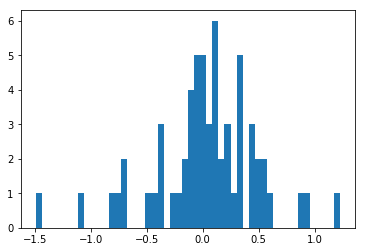

In [51]:
# Do predictions
y_regXGBGS_pred = regXGBGS.predict(X_test)
print(mean_squared_error(y_test,y_regXGBGS_pred))
plt.hist(y_test-y_regXGBGS_pred,bins=50);

In [52]:
y_regXGB_pred

array([ 0.58319783,  0.9088425 ,  0.40034974,  0.5623625 , -1.4346454 ,
        1.1585035 , -0.6654153 , -1.719976  ,  0.2071653 ,  1.0126373 ,
        0.47963387, -1.5927951 ,  1.1110839 , -2.0057952 , -0.20291454,
        1.135329  ,  0.7613572 , -0.6662538 ,  1.200285  , -1.1626049 ,
        1.1361841 ,  0.21319634,  0.5870383 ,  1.1364346 , -0.5192082 ,
        1.0462434 ,  0.6521633 ,  0.18164244,  0.72088933, -1.8724213 ,
       -1.4213632 ,  0.9555315 ,  0.06509185,  0.54526824,  0.89498186,
       -1.5587127 , -0.00709635,  0.60836434, -0.90357137, -1.5636675 ,
        0.54034096,  0.42548656,  1.1307993 , -1.559027  , -1.3823044 ,
        0.6681926 , -0.460046  ,  0.8319716 , -0.1508972 ,  0.59367883,
       -0.5131465 , -0.0211063 ,  0.23165205,  0.06763324,  0.9570463 ,
       -0.02683926,  0.544321  , -0.7915945 ,  0.3614751 , -0.66274786],
      dtype=float32)

In [94]:
df4 = scaler.inverse_transform(y_regXGB_pred)
#df4 = pd.DataFrame(df4)
#df4.columns = colnames
#df4.head(5)

ValueError: operands could not be broadcast together with shapes (60,) (6,) (60,) 

In [96]:
df_test = df_modelize2.copy()
df_test.head()

,VERSION,POWER_MWH,INTEGRAL_COSTS,NUM_TECH,VERSION_Y,VERSION_M
0,201701,940091.558,-11215426.0,1,2017,1
2,201701,22830.702,-242300.0,2,2017,1
4,201701,11909.436,-105460.0,2,2017,1
7,201701,84359.878,-4035043.0,5,2017,1
8,201701,109060.598,-2625416.0,5,2017,1


In [102]:
for index, elem in enumerate(df_test['INTEGRAL_COSTS']):
    if pd.isnull(elem):
        df_test.at[index,'INTEGRAL_COSTS']=df_test.at[index-1,'INTEGRAL_COSTS']

SyntaxError: invalid syntax (<ipython-input-102-9bf531f34ebc>, line 4)

In [100]:
df_test.head()

,VERSION,POWER_MWH,INTEGRAL_COSTS,NUM_TECH,VERSION_Y,VERSION_M
0,201701,940091.558,-11215426.0,1,2017,1
2,201701,22830.702,-242300.0,2,2017,1
4,201701,11909.436,-105460.0,2,2017,1
7,201701,84359.878,-4035043.0,5,2017,1
8,201701,109060.598,-2625416.0,5,2017,1
